In [12]:
from cribbage.cards import *
from cribbage.cribbage_score import *

Counter({0: 38730,
         1: 3772,
         2: 108090,
         3: 19539,
         4: 109807,
         5: 26812,
         6: 69103,
         7: 29145,
         8: 43920,
         9: 13873,
         10: 14786,
         11: 1976,
         12: 12426,
         13: 763,
         14: 3495,
         15: 389,
         16: 2274,
         17: 396,
         18: 99,
         20: 331,
         21: 109,
         22: 18,
         23: 12,
         24: 132,
         28: 3})

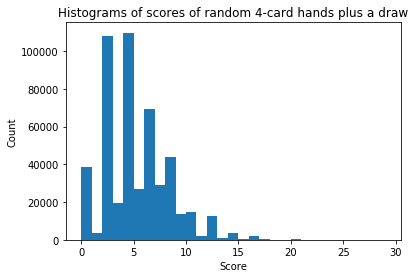

In [13]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import itertools
def generate_5scores():
    while True:
        h, d = make_random_hand_and_draw()
        yield score_hand(h, d)
samples5 = np.array(list(itertools.islice(generate_5scores(), 500000)))
plt.hist(samples5, 29, (0,29))
plt.title('Histograms of scores of random 4-card hands plus a draw')
plt.xlabel('Score')
plt.ylabel('Count')
Counter(samples5)

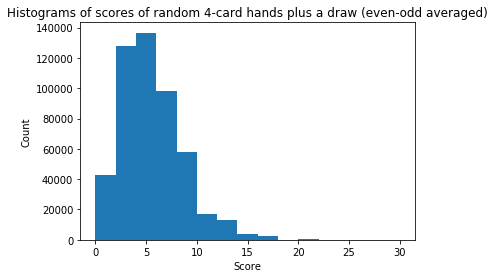

In [14]:
plt.hist(samples5, 15, (0,30))
plt.title('Histograms of scores of random 4-card hands plus a draw (even-odd averaged)')
plt.xlabel('Score')
plt.ylabel('Count')

In [15]:
%timeit h,d = make_random_hand_and_draw() ; score_hand(h,d)

10000 loops, best of 3: 79.5 µs per loop


In [19]:
from cribbage import _cribbage_score as c_cribbage_score
%timeit h,d = make_random_hand_and_draw() ; c_cribbage_score.score_hand(h,d)

The slowest run took 5.98 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 11.9 µs per loop


In [21]:
h,d = make_random_hand_and_draw()
%timeit score_hand(h,d)

The slowest run took 6.68 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 51 µs per loop


In [22]:
%timeit c_cribbage_score.score_hand(h,d)

The slowest run took 11.97 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 418 ns per loop


In [23]:
%timeit h,d = make_random_hand_and_draw()

The slowest run took 7.20 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 11.8 µs per loop
